<a href="https://colab.research.google.com/github/jindalshiva/Auth/blob/master/Styleblit_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from scipy.ndimage import gaussian_filter

In [144]:
def im2double(im):
    min_val = np.min(im.ravel())
    max_val = np.max(im.ravel())
    out = im.astype('float')
    #- min_val) / (max_val - min_val)
    return out


In [147]:
#load style
def load_style(style_id):
  #g_s = style exampler
  #a_s = alpha guide
  #c_s = style guide

  g_s = cv2.imread("normal.png",-1)
  g_s = im2double(g_s)
  input_file='0'+str(style_id)+'.png'
  a_s = cv2.imread(input_file,-1)
  c_s = cv2.imread(input_file,1)
  c_s = im2double(c_s);
  a_s = im2double(a_s);
  h,w = c_s.shape[:2]
  cv2_imshow(c_s)
  cv2_imshow(g_s)
  cv2_imshow(a_s)  


  g_s = cv2.resize(g_s,(h,w))

  return c_s,g_s,a_s


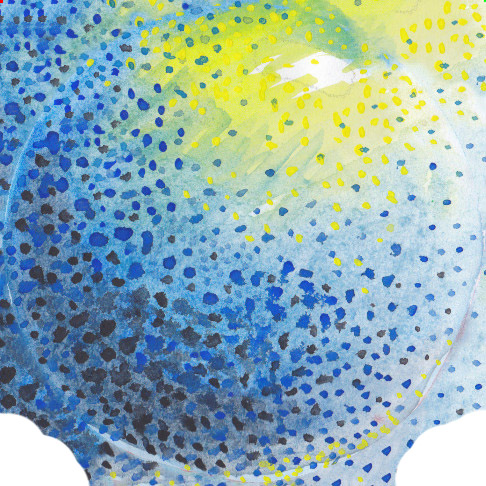

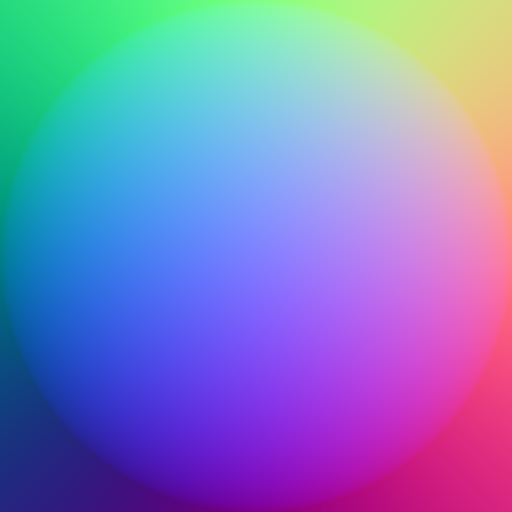

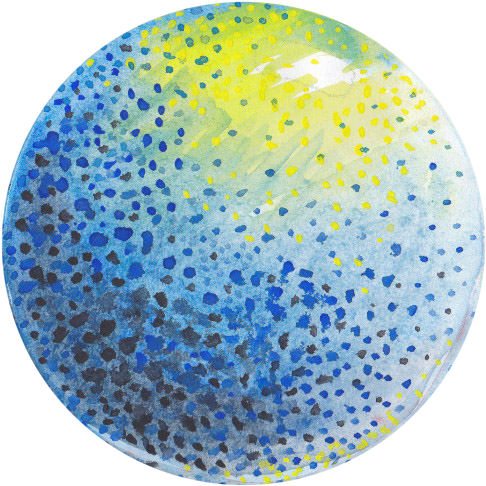

In [158]:
c_s, g_s, a_s = load_style(1)


In [159]:
def load_target(frame):
    # % LOAD_TARGET Load target image with the given frame number.
    # %
    # % Inputs:
    # % - frame: frame number [1, ..., 60]
    # %
    # % Outputs:
    # % - G_T: target guide
    # % - A_T: target alpha


        
    target_file='/content/golem.0'+str(frame)+'.png'
    A_T = cv2.imread(target_file,-1)
    G_T = cv2.imread(target_file,1)
    G_T = im2double(G_T)
    A_T = im2double(A_T)
    cv2_imshow(A_T)
    cv2_imshow(G_T)
    # img=cv2.imread(target_file)
    #cv2_imshow(img)
    return G_T,A_T

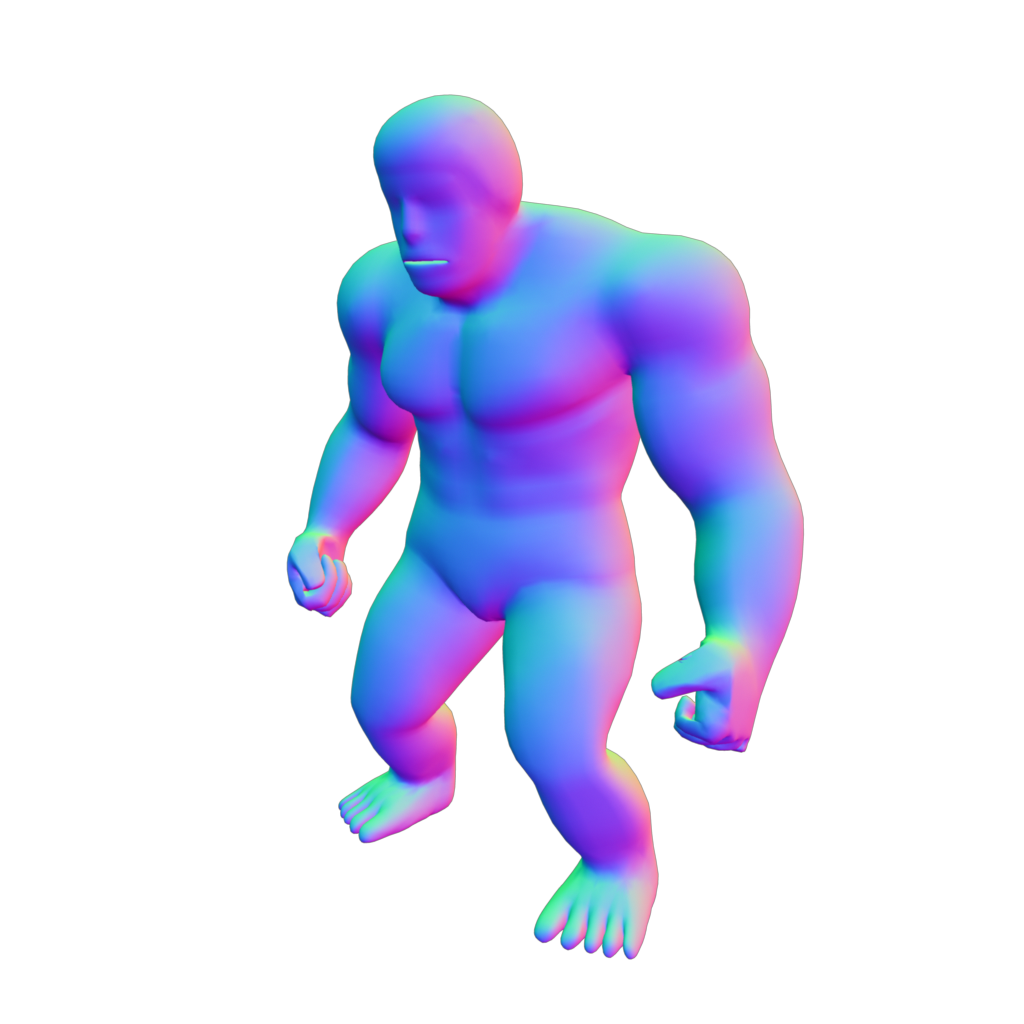

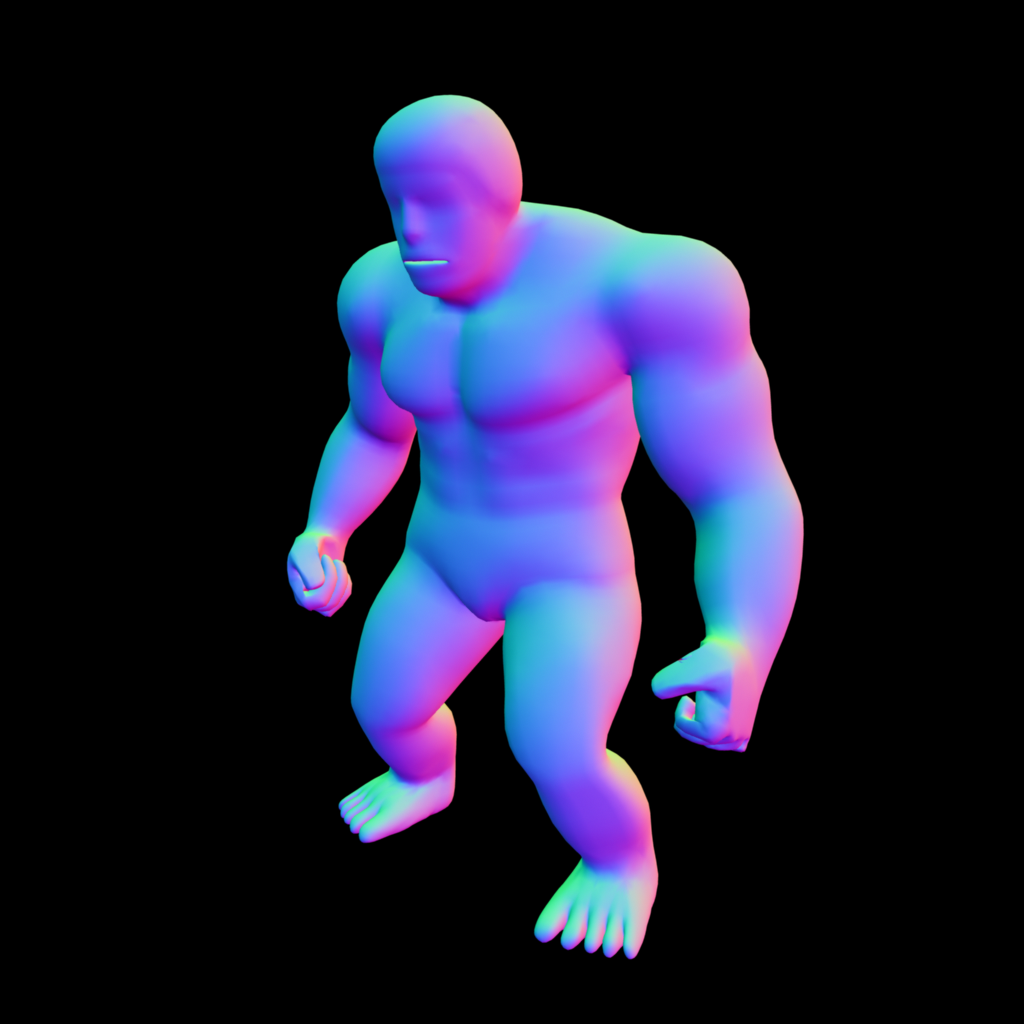

(array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]), array([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
  

In [160]:
load_target('01')

In [167]:
def separate_base_detail(I, s):
  #b = base layer
  #d = detail layer
  b = cv2.GaussianBlur(I, ksize=(0, 0), sigmaX=s, borderType=cv2.BORDER_REPLICATE)
  d = I-b;
  return b,d

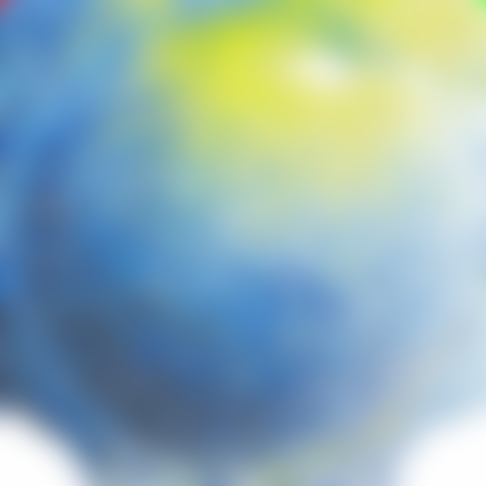

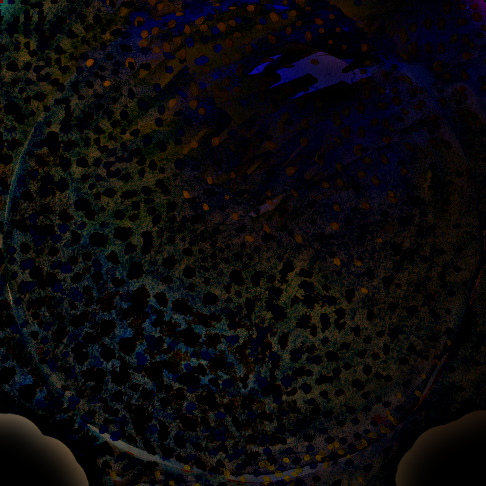

In [173]:
img = cv2.imread("01.png",1)
b,d = separate_base_detail(c_s,15)
cv2_imshow(b)
cv2_imshow(d)

In [ ]:
def base_transfer(b_s, g_s, g_t):
    # - B_S: style base layer
    # - G_S: style guide
    # - G_T: target guide
    # Outputs:
    # - B_T: target base layer

    

    


In [174]:
def styleblit_cluster(B_S, D_S, G_S, G_T, A_T, k=200, density=1.0):
  # Base layer transfer
  B_T = base_transfer(B_S, G_S, G_T);
 
  # Detail layer transfer
  D_T, idx = detail_transfer(D_S, G_S, G_T, A_T, k, density);
 
  # Compute final color
  C_T = B_T + D_T;

  C_T = clamp(C_T, 0, 1);
  
  return C_T, B_T, D_T, idx